QB_Logo.svg

---
Fundamentals of Quantitative Biology 301400-1, WS2024

# **Statistics 01**
---

These notebooks are designed to be worked through step by step, so we encourage you to go through all of it!  This notebook has many tutorial cells that might help you get started with Python and coding in general.


# Introduction

After read mapping, e.g. with cellranger, the output of a single-cell RNA sequencing (scRNA-seq) experiment is usually stored as a matrix containing the raw read counts, with rows corresponding to cells and columns corresponding to genes. In this and the following exercises, we will look at the typical analysis of an example scRNA-seq dataset of peripheral blood mononuclear cells provided by [10x Genomics](http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz)$^1$.

For the following tasks, we have simplified the scRNA-seq dataset and make it available via **Moodle**.
Let's start by downloading the data `adata_raw.csv` and upload it back to our personal drive folder:


$^1$*3k PBMCs from a Healthy Donor, Chromium Demonstration (v2 Chemistry) by Cell Ranger 1.1.0, 10x Genomics.*

In [2]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

Mounted at /content/drive


We are now able to import the data as a data frame using the Python module `pandas`. A `pandas` data frame can be imagined as a numeric matrix with additional row and column names.

Further information on the Python module [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

In [3]:
import pandas as pd
counts = pd.read_csv('/content/drive/MyDrive/adata_raw.csv',index_col=0)
print("This is a pandas dataframe:")
counts

This is a pandas dataframe:


,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,UBIAD1,...,BRWD1,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,COL6A2,S100B,PRMT2
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


You can now also access cell and gene names using the following commands:

In [ ]:
print("These are the first 3 cell names of our experiment:")
print(counts.index[0:3])

These are the first 3 cell names of our experiment:
Index(['AAACATACAACCAC-1', 'AAACATTGAGCTAC-1', 'AAACATTGATCAGC-1'], dtype='object')


In [ ]:
print("And here we print the first 3 gene names:")
print(counts.columns[0:3])

And here we print the first 3 gene names:
Index(['TNFRSF4', 'CPSF3L', 'ATAD3C'], dtype='object')


# Useful commands for the following exercises:

Here we present some useful commands that you can use to solve the following exercises. To show their functionality, we will apply them to the following toy dataset:

In [4]:
import numpy as np
import pandas as pd

toy_data = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
toy_data.index = ["Cell_1","Cell_2","Cell_3"]
toy_data.columns = ["Gene_A","Gene_B","Gene_C"]
toy_data

,Gene_A,Gene_B,Gene_C
Cell_1,1,2,3
Cell_2,4,5,6
Cell_3,7,8,9


In [5]:
import numpy as np
toy_array = np.repeat(range(0,10),range(0,10))
toy_array

array([1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9,
       9])

**Useful functions**

Many useful functions are available via the Python module `numpy`, which we called above via `import numpy as np`. Examples are finding the maximum of a collection of values via `np.max()`, the minimum via `np.min()` or the sum via `np.sum()`.

Further information on the Python module [`numpy`](https://numpy.org/doc/stable/user/absolute_beginners.html)

In [ ]:
np.max(toy_array)

9

In [ ]:
np.sum(toy_array)

285

**Apply functions row- or column-wise**

You can apply a function not only to arrays, but also to any row or column in a `pandas` data frame. For example `toy_data.apply(np.mean, axis=0)`
would return the mean expression of each gene across all sequenced cells. Instead of `np.mean` you can also use other functions such as `np.max` etc. If you specify `axis=1`, the above code applies the function to each row in the data frame, in our case per cell.

In [ ]:
toy_data.apply(np.max, axis=0)

,0
Gene_A,7
Gene_B,8
Gene_C,9


**Subset your data**

You can retrieve a subset of the data in your data frame using the function `toy_data.loc[]`. The syntax is: `toy_data.loc['row_name', 'column_name']`. To get all values of a column, you can use the colon, e.g. `toy_data.loc[:, 'column name']`. If you write the colon after the comma, you will receive all the entries in a row.

You can also use Booleans to subset rows and columns, this allows you to extract all data for which a condition is fulfilled. You can select all genes of cell `cell_1` with a count greater than one by first determining the counts of `cell_1`: `read_counts = toy_data.loc['Cell_1', :]` and then selecting `toy_data.loc['Cell_1', read_counts > 1]`.


In [ ]:
toy_data

,Gene_A,Gene_B,Gene_C
Cell_1,1,2,3
Cell_2,4,5,6
Cell_3,7,8,9


In [ ]:
toy_data.loc['Cell_1',:]

,Cell_1
Gene_A,1
Gene_B,2
Gene_C,3


In [ ]:
toy_data.loc['Cell_2', 'Gene_C']

6

In [ ]:
read_counts = toy_data.loc['Cell_1', :]
toy_data.loc['Cell_1', read_counts > 1]

,Cell_1
Gene_B,2
Gene_C,3


**Numeric value of Boolean values**

When you apply a numeric function to a Boolean array, `True` is treated as 1 and `False` as 0. The sum of a Boolean array hence is the number of `True` entries.

In [ ]:
toy_array < 2

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [ ]:
np.sum(toy_array < 2)

1

**Plotting a histogram**

If you have an array of numeric values, you can use the Python module `matplotlib.pyplot` to plot a histogram of normalized/relative frequencies with e.g. 9 bins as follows: `plt.hist(toy_array, 9, density = True)`.

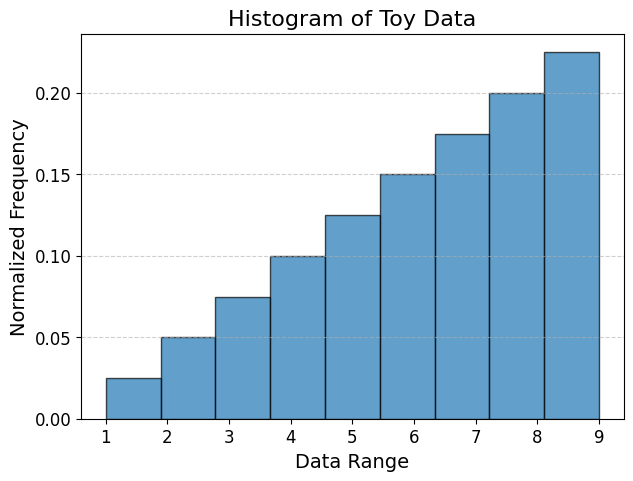

In [6]:
import matplotlib.pyplot as plt

# Create histogram
plt.figure(figsize=(7, 5))  # Adjust figure size
plt.hist(toy_array, bins=9, density=True, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Data Range", fontsize=14)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.title("Histogram of Toy Data", fontsize=16)

# Improve layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


# Exercises

In the first step of the scRNA-seq downstream analysis, we want to review some summary statistics that will give us an idea of the quality of our data. We start with information on how many reads we actually sequenced per cell. Cells with few or no reads are assumed to be dead cells, and cells with an extremely high number of reads are assumed to be duplicates, i.e. two cells measured as one. In the subsequent analysis, you want to filter out such cells from your data set.

## Task 1:

1.  For the first cell `AAACATACAACCAC-1` compute the total sum of reads across all genes.

2. Compute the number of cells, in which the second gene `CPSF3L` was detected with *at least* one read.

3. Create histogram with 50 bins of the total sums of reads per cell.

4. Perform the following filtering consecutively:

    a)   Subset your data to cells, in which at least 120 different genes were detected with at least one read.

    b)   Next, subset the remaining data to cells with at most 2500 total reads.

    c)   Next, subset the remaining data to genes that were detected in at least 3 cells with at least one read.

  **How many cells and genes are left after the last filtering step c)?**

  **Plot the histogram described in Task 1.3. on the data obtained after filtering step c).**

In [ ]:
## 1.1
print("The total sum of all reads in cell AAACATACAACCAC-1 is:")


In [ ]:
## 1.2
print("The number of cells in which gene CPSF3L was detected is:")


In [ ]:
## 1.3
import matplotlib.pyplot as plt


In [ ]:
## 1.4


# Task 2:

Now let's look at how certain genes are expressed in the different cells. As you saw in Task 1, the cells in a scRNA-seq file can have different total sums of reads, which makes this comparison challenging. However, we can solve this problem and make the cells comparable by normalizing the read counts. For the following exercises, you will use the filtered counts (hereafter simply referred to as `counts`) that you created in the previous Task 1.4, after the last filtering step c).

1. Peform a *log-normalization* by implementing the following steps consecutively:

    a) Compute the relative gene counts per cell, i.e., divide `counts` by the total sum of reads per cell by using the command `counts.div(total_reads_per_cell, axis=0)`.
    
    **Attention**: Do not forget to *recompute* the total sum of reads per cell,`total_reads_per_cell`, for the newly filtered data.

    b) Next, multiply every entry of the relative count matrix by 10,000 and add a 1 (= pseudocount).

    c) Finally, compute the (natural) logarithm entry-wise.

  **Compute the total sum of entries of the log-normalized data matrix across all genes and all cells**. What do you think is the reason for adding a pseudocount in step b)?

2. Compute the **mean and the median** value of `CST3` and `PPBP` counts across cells using the log-normalized data from the previous task. Do they both describe the data equally well?


In [ ]:
## 2.1


In [ ]:
## 2.2


In [ ]:
## 2.3
